In [11]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
with open('main_research_1.json') as f:
    data = json.load(f)

In [13]:
arrivals = []
containers_load_time = []
airplane_80_load_time = []
airplane_140_load_time = []

for k, v in data.items():
    for item in v:
        arrivals.append(k)
        containers_load_time.append(item[0])
        airplane_80_load_time.append(item[1]['80'])
        if '140' in item[1].keys():
            airplane_140_load_time.append(item[1]['140'])
        else:
            airplane_140_load_time.append([np.nan, np.nan])

df = pd.DataFrame({'arrivals': arrivals, 'containers_load_time': containers_load_time,
                   'airplane_80_load_time': airplane_80_load_time, 'airplane_140_load_time': airplane_140_load_time})
df['arrivals'] = df['arrivals'].astype('int32')
df['airplane_80_load_time'] = df['airplane_80_load_time'].apply(lambda x: x[0])
df['airplane_140_load_time'] = df['airplane_140_load_time'].apply(lambda x: x[0])
df.head(7)

,arrivals,containers_load_time,airplane_80_load_time,airplane_140_load_time
0,1,0.0,172.676471,676.666667
1,1,0.0,179.843750,570.500000
2,1,0.0,176.588235,704.888889
3,1,0.0,169.914286,713.750000
4,1,0.0,177.352941,651.000000
5,1,0.0,179.735294,656.444444
6,1,0.0,175.882353,671.222222


In [14]:
df_mean = df.groupby('arrivals').agg({'containers_load_time': np.mean, 'airplane_80_load_time': np.mean, 'airplane_140_load_time': np.mean}).reset_index(drop=False)
df_mean.head(5)

,arrivals,containers_load_time,airplane_80_load_time,airplane_140_load_time
0,1,0.000000,177.335756,643.888258
1,2,990.750000,178.222813,647.664444
2,3,1321.999924,174.855240,668.408889
3,4,1483.500000,180.894033,639.660278
4,5,1583.200000,176.870240,643.284444


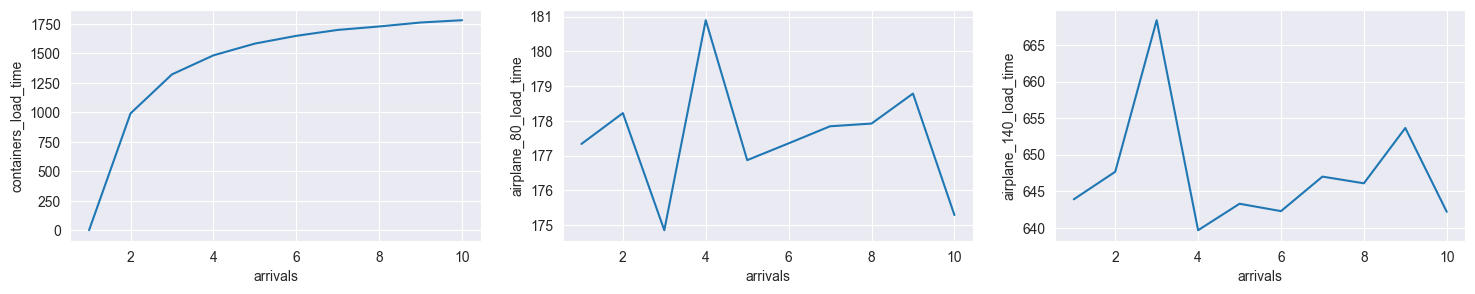

In [15]:
fig, ax = plt.subplots(1, 3, figsize=(18, 3))
sns.lineplot(data=df_mean, x='arrivals', y='containers_load_time', ax=ax[0])
sns.lineplot(data=df_mean, x='arrivals', y='airplane_80_load_time', ax=ax[1])
sns.lineplot(data=df_mean, x='arrivals', y='airplane_140_load_time', ax=ax[2])
plt.show()